# CONSOLIDATE DatePrep

In [1]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti'

import sys
print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [2]:

class Data(object):
    pass

df = Data
summ = Data


In [3]:
import helpdesk as hd

In [4]:

import pandas as pd, numpy as np
from datetime import datetime


In [5]:

DEBUG = True
seed = 1919


In [37]:

pd.set_option('display.max_rows', 50);
pd.set_option('display.max_columns', 50);
pd.set_option('display.width', 200);


In [6]:
# Import the Base Dataset
base_dataset_name = 'dataset_base_2022-12-03.csv'

df_base_raw = pd.read_csv(f'{fileloc}/{base_dataset_name}')

print(df_base_raw.shape)
print()
print(df_base_raw.columns.values.tolist())


(588017, 42)

['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc', 'h_rand_all_plc', 'p_rand_all_plc', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last']


In [7]:

print(pd.DataFrame(df_base_raw.isna().sum()).transpose())


   @id_DOG  DogName  y_runtime  RaceId  @id_RACE  Distance  RaceGrade  Track  \
0        0        0          0       0         0         0          0      0   

   Event_Dt  ft_sp  ...  p_rand_lay_last  ft_1  h_ft_1  p_ft_1  ft_all_plc  \
0         0      0  ...                0     0       0       0           0   

   h_ft_all_plc  p_ft_all_plc  ft_lay_last  h_ft_lay_last  p_ft_lay_last  
0             0             0            0              0              0  

[1 rows x 42 columns]


In [8]:
# Import the Speed Profile

speed_profile_name = 'dataprep_speed_profile_2022-12-03.csv'

df_speed_profile = pd.read_csv(f'{fileloc}/{speed_profile_name}')

print(df_speed_profile.shape)
print()
print(df_speed_profile.columns.values.tolist())
print()


(588017, 19)

['@id_DOG', '@id_RACE', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist']



In [9]:

print(pd.DataFrame(df_speed_profile.isna().sum()).transpose())


   @id_DOG  @id_RACE  x_races_tot  x_dist_gp  x_runtm_gp  x_rtgp_prev  \
0        0         0            0          0           0            0   

   x_rtgp_avg  x_rtgp_min  x_rtgp_max  x_rtgp_range  x_rtgp_std  \
0           0           0           0             0           0   

   x_no_prev_races  x_speed_prev  x_speed_avg  x_speed_min  x_speed_max  \
0                0             0            0            0            0   

   x_speed_range  x_speed_std  x_no_prev_r_in_dist  
0              0            0                    0  


In [10]:

# Import the Race Profile
race_profile_name = 'dataprep_raceprofile_2022-12-03.csv'

df_race_profile = pd.read_csv(f'{fileloc}/{race_profile_name}')

print(df_race_profile.shape)
print()
print(df_race_profile.columns.values.tolist())


(588017, 16)

['@id_DOG', '@id_RACE', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1']


In [11]:

print(pd.DataFrame(df_race_profile.isna().sum()).transpose())


   @id_DOG  @id_RACE  G5  G4  G3  G2  G1  Gmix  Gmas  Gmai  Gh  Gres  Gnov  \
0        0         0   0   0   0   0   0     0     0     0   0     0     0   

   Gsp  Gfin  RaceGrade_H1  
0    0     0             0  


In [12]:

# Import the Race Profile
dateprep_categorical = 'dataprep_categorical_2022-12-03.csv'

df_categorical = pd.read_csv(f'{fileloc}/{dateprep_categorical}')

print(df_categorical.shape)
print()
print(df_categorical.columns.values.tolist())


(588017, 13)

['@id_DOG', 'DogName', '@id_RACE', 'RaceName', 'Distance', 'x_dist_gp', 'dist300', 'dist350', 'dist400', 'dist450', 'dist500', 'dist600', 'dist700']


In [13]:

print(pd.DataFrame(df_categorical.isna().sum()).transpose())


   @id_DOG  DogName  @id_RACE  RaceName  Distance  x_dist_gp  dist300  \
0        0        0         0        15         0          0        0   

   dist350  dist400  dist450  dist500  dist600  dist700  
0        0        0        0        0        0        0  


In [14]:

# Import the Performance Dataset
dateprep_perf = 'dataprep_performance_2022-12-03.csv'

df_perf = pd.read_csv(f'{fileloc}/{dateprep_perf}')

print(df_perf.shape)
print()
print(df_perf.columns.values.tolist())


(588017, 24)

['@id_DOG', '@id_RACE', 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct', 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_finl5_plc', 'xr_finl5_plc_pct']


In [15]:

print(pd.DataFrame(df_perf.isna().sum()).transpose())


   @id_DOG  @id_RACE  xr_races  xr_races_l5  xr_wins  xr_wins_pct  xr_wins_l5  \
0        0         0         0            0        0            0           0   

   xr_wins_l5_pct  xr_fin_t2  xr_finl5_t2  ...  xr_finl5_last  \
0               0          0            0  ...              0   

   xr_finl5_last_pct  xr_fin_last2  xr_fin_last2_pct  xr_finl5_last2  \
0                  0             0                 0               0   

   xr_finl5_last2_pct  xr_fin_plc  xr_fin_plc_pct  xr_finl5_plc  \
0                   0           0               0             0   

   xr_finl5_plc_pct  
0                 0  

[1 rows x 24 columns]


In [16]:

# Merge the datasets together
print(df_base_raw.shape)
print(df_speed_profile.shape)
print(df_race_profile.shape)

print()
print()

df_base0 = pd.merge( df_base_raw, df_speed_profile, on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base0.shape)
print(df_base0.columns.values.tolist())

print()
print()
df_base1 = pd.merge( df_base0, df_race_profile, on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base1.shape)
print(df_base1.columns.values.tolist())

print()
print()
df_base2 = pd.merge( df_base1, df_categorical.drop(columns = ['DogName','Distance','x_dist_gp']), on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base2.shape)
print(df_base2.columns.values.tolist())

print()
print()
df_base = pd.merge( df_base2, df_perf, on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base.shape)
print(df_base.columns.values.tolist())

del df_base0, df_base1, df_base2


(588017, 42)
(588017, 19)
(588017, 16)


(588017, 59)
['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc', 'h_rand_all_plc', 'p_rand_all_plc', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist']


(588017, 73)
['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'Ra

### Normalising the x_speed_prev in Each RaceId

In [17]:

"""
NOTE:
    When mean is 0 created flag - No Prev Races
    When std is 0 create flag - No Std
    
Q Sau takke ka sawaal ? 
    Missing Norm values be replaced with 0 or 0.5.
        Currently used 0.5    

print(datetime.now())

ds_norm = df_base1.groupby('@id_RACE')['x_speed_prev'].agg( ['mean','std'] ).reset_index().rename(columns = {'mean':'x_speed_prev_mean', 'std':'x_speed_prev_std'} )

df_base1 = df_base1.merge( ds_norm , on = '@id_RACE' )
df_base1['x_no_speed_prev_std'] = df_base1['x_speed_prev_std'].apply(lambda x : 1 if x == 0 else 0 )

df_base1['x_speed_prev_norm'] = (df_base1['x_speed_prev'] - df_base1['x_speed_prev_mean']) / df_base1['x_speed_prev_std']
df_base1['x_speed_prev_norm'] = df_base1.apply(lambda x : 0.5 if (x.x_speed_prev_mean == 0) | (x.x_speed_prev_std == 0) | (pd.isna(x.x_speed_prev_std)) else ( x.x_speed_prev - x.x_speed_prev_mean ) / x.x_speed_prev_std, axis = 1) 
#df_base1['x_speed_prev_norm'] = df_base1['x_speed_prev_norm'].fillna(0.5)

"""

print(datetime.now())


2022-12-03 05:51:09.471127


In [18]:

# QC the Transformation
print(pd.DataFrame(df_base.isna().sum()).transpose())
qc_missing = pd.DataFrame(df_base.isna().sum())
#qc_missing.to_csv()
qc_missing.to_csv(f'{fileloc}/missing.csv', index = False)

#df_base2.groupby('x_no_prev_races')['x_speed_prev_std'].isna().sum()
#df_base2.groupby('x_no_prev_races')[['x_speed_prev_mean', 'x_speed_prev_std']].apply(lambda x: x.isna().sum())
#df_base1.groupby(['x_no_prev_races','x_no_speed_prev_std'])[['x_speed_prev_mean', 'x_speed_prev_std']].apply(lambda x: x.eq(0).sum())


   @id_DOG  DogName  y_runtime  RaceId  @id_RACE  Distance  RaceGrade  Track  \
0        0        0          0       0         0         0          0      0   

   Event_Dt  ft_sp  ...  xr_finl5_last  xr_finl5_last_pct  xr_fin_last2  \
0         0      0  ...              0                  0             0   

   xr_fin_last2_pct  xr_finl5_last2  xr_finl5_last2_pct  xr_fin_plc  \
0                 0               0                   0           0   

   xr_fin_plc_pct  xr_finl5_plc  xr_finl5_plc_pct  
0               0             0                 0  

[1 rows x 103 columns]


In [19]:

print(df_base.columns.values.tolist())


['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc', 'h_rand_all_plc', 'p_rand_all_plc', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'RaceName', 'dist300', 'dist350', '

In [20]:

#df_base1['x_rtgp_prev'].plot( kind='density', legend=True, figsize = (24,8) )
#df_base['x_rtgp_avg'].plot( kind='density', legend=True, figsize = (24,8) )


In [20]:

# Normalising multiple columns in loop

print(datetime.now())

cols_to_norm = ['xr_races' \
                , 'x_speed_prev' ,'x_speed_avg' ,'x_speed_min' ,'x_speed_max' ,'x_speed_range'\
                , 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range'\
                , 'xr_wins', 'xr_wins_pct', 'xr_fin_t2', 'xr_fin_t2_pct'\
                , 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_finl5_t2', 'xr_finl5_t2_pct'\
                , 'xr_fin_plc', 'xr_fin_plc_pct'\
                , 'xr_fin_last', 'xr_fin_last_pct', 'xr_fin_last2', 'xr_fin_last2_pct'
                , 'xr_finl5_last', 'xr_finl5_last_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct']

for curr_col in cols_to_norm:
    
    mean_name = curr_col + '_mean'
    std_name = curr_col + '_std'
    no_std_name = curr_col + '_std' + '_no'
    norm_name = curr_col + '_norm'
    
    print(mean_name, std_name, norm_name)

    ds_norm = df_base.groupby('@id_RACE')[curr_col].agg(['mean','std']).reset_index().rename(columns = {'mean':mean_name, 'std':std_name})

    df_base = df_base.merge(ds_norm , on = '@id_RACE')
    df_base[no_std_name] = df_base[std_name].apply(lambda x : 1 if x == 0 else 0)

    #df_base[norm_name] = (df_base[curr_col] - df_base[mean_name]) / df_base[std_name]
    #df_base['x_speed_prev_norm'] = df_base.apply(lambda x : 0.5 if (x.x_speed_prev_mean == 0) | (x.x_speed_prev_std == 0) | (pd.isna(x.x_speed_prev_std)) else ( x.x_speed_prev - x.x_speed_prev_mean ) / x.x_speed_prev_std, axis = 1)
    df_base[norm_name] = df_base.apply(lambda x : 0 if (x[mean_name] == 0) | (x[std_name] == 0) | (pd.isna(x[std_name])) else ( x[curr_col] - x[mean_name] ) / x[std_name], axis = 1)
    #df_base[norm_name] = df_base[norm_name].fillna(0.5)
    
    df_base.drop(columns = [mean_name, std_name, no_std_name], inplace = True)
    
    del ds_norm, mean_name, std_name, no_std_name, norm_name

print()
print(datetime.now())


2022-12-03 05:57:24.997447
xr_races_mean xr_races_std xr_races_norm
x_speed_prev_mean x_speed_prev_std x_speed_prev_norm
x_speed_avg_mean x_speed_avg_std x_speed_avg_norm
x_speed_min_mean x_speed_min_std x_speed_min_norm
x_speed_max_mean x_speed_max_std x_speed_max_norm
x_speed_range_mean x_speed_range_std x_speed_range_norm
x_rtgp_prev_mean x_rtgp_prev_std x_rtgp_prev_norm
x_rtgp_avg_mean x_rtgp_avg_std x_rtgp_avg_norm
x_rtgp_min_mean x_rtgp_min_std x_rtgp_min_norm
x_rtgp_max_mean x_rtgp_max_std x_rtgp_max_norm
x_rtgp_range_mean x_rtgp_range_std x_rtgp_range_norm
xr_wins_mean xr_wins_std xr_wins_norm
xr_wins_pct_mean xr_wins_pct_std xr_wins_pct_norm
xr_fin_t2_mean xr_fin_t2_std xr_fin_t2_norm
xr_fin_t2_pct_mean xr_fin_t2_pct_std xr_fin_t2_pct_norm
xr_wins_l5_mean xr_wins_l5_std xr_wins_l5_norm
xr_wins_l5_pct_mean xr_wins_l5_pct_std xr_wins_l5_pct_norm
xr_finl5_t2_mean xr_finl5_t2_std xr_finl5_t2_norm
xr_finl5_t2_pct_mean xr_finl5_t2_pct_std xr_finl5_t2_pct_norm
xr_fin_plc_mean xr_fin_

In [25]:

print(df_base.columns.values.tolist())


['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc', 'h_rand_all_plc', 'p_rand_all_plc', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'RaceName', 'dist300', 'dist350', '

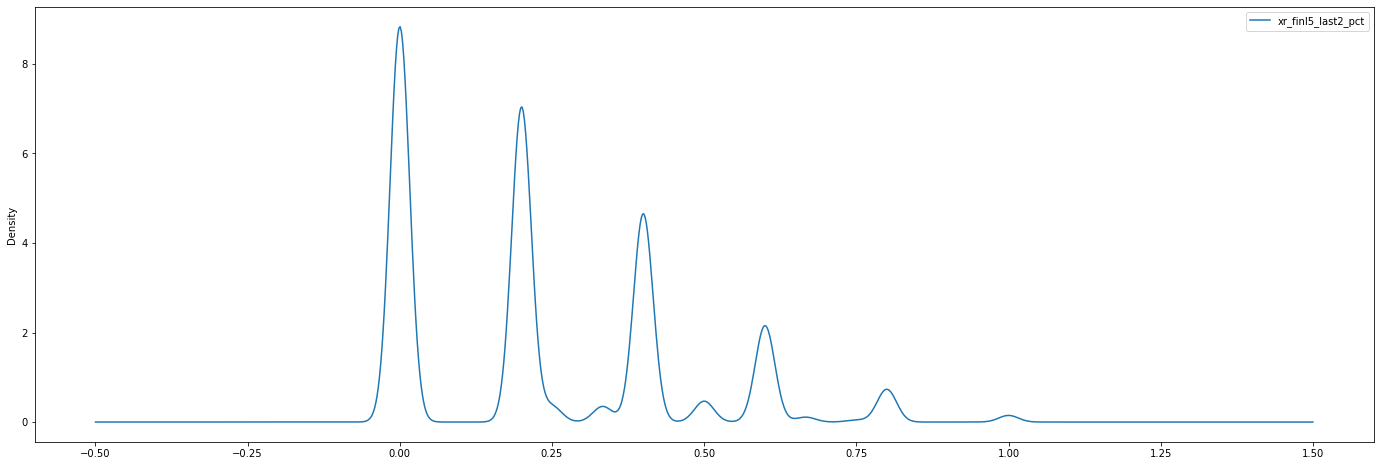

In [22]:

#df_base['x_races_tot_norm'].plot( kind='density', legend=True, figsize = (24,8) )
#df_base['x_rtgp_avg_norm'].plot( kind='density', legend=True, figsize = (24,8) )
#df_base['x_rtgp_max_norm'].plot( kind='density', legend=True, figsize = (24,8) )

#df_base['y_margin'].plot( kind='density', legend=True, figsize = (24,8) )
#df_base['xr_wins_pct_norm'].plot( kind='density', legend=True, figsize = (24,8) )
df_base['xr_finl5_last2_pct'].plot( kind='density', legend=True, figsize = (24,8) )


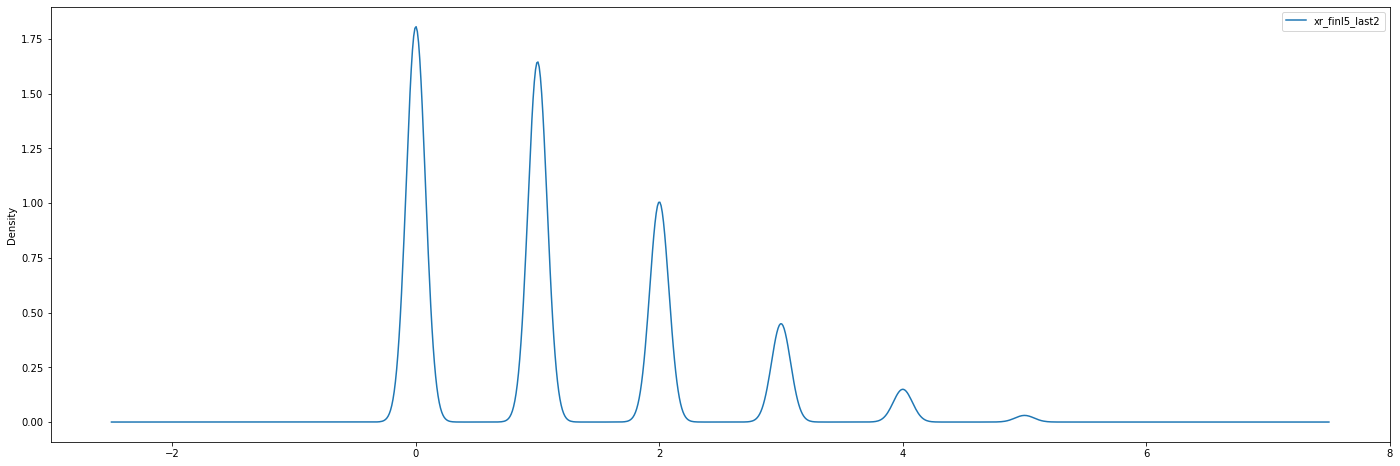

In [23]:

df_base['xr_finl5_last2'].plot( kind='density', legend=True, figsize = (24,8) )


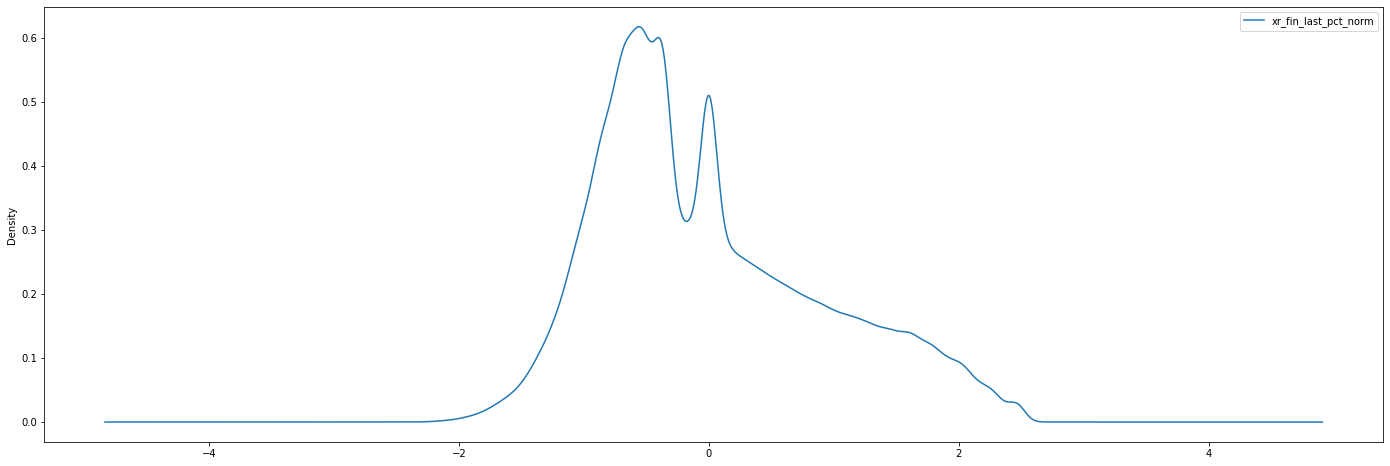

In [24]:

df_base['xr_fin_last_pct_norm'].plot( kind='density', legend=True, figsize = (24,8) )


In [29]:

print(df_base.columns.values.tolist())


['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc', 'h_rand_all_plc', 'p_rand_all_plc', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'RaceName', 'dist300', 'dist350', '

#### EXPORTING THE MODEL FILE

In [26]:

#keep_cols_for_export = ['@id_DOG', 'DogName', '@id_RACE','RaceName','Track','RaceGrade','Distance','TrainerName','RunTime','Place','x_races_tot']

# 'TrainerName', 'Track' have been dummified
#cols_to_keep = ['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'position', 'ft_sp', 'x_num_dogs', 'Top3_actual', 'position_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'Winner_actual', 'Winner_random', 'Top3_random']

#cols_for_drop = ['y_margin_y','y_pos_y']
cols_for_drop = []

#'Event_Dt', 

todaydt = datetime.now().date()
exp_fname = f'modeling_base_{todaydt}.csv'

exp_ds = df_base.drop(columns = cols_for_drop).rename(columns = {'y_margin_x':'y_margin', 'y_pos_x':'y_pos'})


KeyError: "['y_margin_y' 'y_pos_y'] not found in axis"

In [27]:

print(pd.DataFrame(exp_ds.isna().sum()))


NameError: name 'exp_ds' is not defined

In [ ]:

print(exp_ds.shape)


In [ ]:

print(exp_ds.columns.values.tolist())


In [ ]:

exp_ds.tail(5)


In [ ]:

exp_ds.describe()


In [ ]:

exp_ds.to_csv(f'{fileloc}/{exp_fname}', index = False)


In [ ]:

print(datetime.now())
print()
print("THE END")
